<a href="https://colab.research.google.com/github/ashrafelnagar1/Graduation-Project/blob/main/TimeSeriesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor,BaggingRegressor
# Import Scalling and Normalization functions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Import Metrices
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error
ts_cross_val = TimeSeriesSplit(n_splits=5)

# Prepare Data

In [ ]:
def prepare_data (X):

    df = pdr.DataReader(X,data_source='yahoo' ,start='2014-01-01') #read data
    df.drop('Volume',axis='columns',inplace=True)
    print(df.info()) 
    print('----------------')
    print(df.head())
    print('----------------')
    print('Null values in data = {}'.format(df.isna().sum().sum())) # See if there are null values
    
    #df=df.reset_index() #drop Date Column from input
    #scaler = MinMaxScaler(feature_range=(0,1))
    #df[df.columns] = scaler.fit_transform(df)  #^^^^^^^^^^^^^
    X=df[['High','Low','Open','Adj Close']]#input columns
    y=df[['Close']] #output column
    
    #Scalling input data
    #sc_x = StandardScaler()
    #x = sc_x.fit_transform(X)
    #X = pd.DataFrame(x,columns=[X.columns])
    
    
    
    test_size=0.2
    test_index = int(len(X)*(1-test_size))
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, y_train, X_test, y_test
    
 

In [ ]:
#Get models data
X_train , y_train , X_test , y_test  = prepare_data('F')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1850 entries, 2014-01-02 to 2021-05-07
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1850 non-null   float64
 1   Low        1850 non-null   float64
 2   Open       1850 non-null   float64
 3   Close      1850 non-null   float64
 4   Adj Close  1850 non-null   float64
dtypes: float64(5)
memory usage: 86.7 KB
None
----------------
             High    Low   Open  Close  Adj Close
Date                                             
2014-01-02  15.45  15.28  15.42  15.44  10.945109
2014-01-03  15.64  15.30  15.52  15.51  10.994732
2014-01-06  15.76  15.52  15.72  15.58  11.044353
2014-01-07  15.74  15.35  15.73  15.38  10.902575
2014-01-08  15.71  15.51  15.60  15.54  11.015998
----------------
Null values in data = 0


# Models

## Ridge Model

In [ ]:
def Ridge (X_train,y_train,X_test,y_test):

  from sklearn.linear_model import Ridge
  ridge = Ridge(alpha=0.1)
  ridge.fit(X_train, y_train)#fitting model
  
  cv_ridge = cross_val_score(ridge, X_train, y_train, cv = ts_cross_val, scoring= "neg_mean_squared_error")
  print('Cross Val Score {}'.format(cv_ridge))
  
  #y_pred_ridge_train=ridge.predict(X_train)
  Ridge_predictions=ridge.predict(X_test)
  
  plt.figure(figsize=(20,8))
  plt.plot(ridge.predict(X_test[-400:]), "y", label="prediction", linewidth=2.0)
  plt.plot(y_test.values[-400:], "g", label="real_values", linewidth=2.0)
  plt.legend(loc="best")
  
  MAE_ridge=mean_absolute_error(Ridge_predictions,y_test)
  MSE_ridge=mean_squared_error(Ridge_predictions,y_test)
  print('MAE for Ridge regressor {} and MSE  is {}'.format(MAE_ridge,MSE_ridge))
  
  return MAE_ridge,MSE_ridge,ridge

Cross Val Score [-0.02593457 -0.0119308  -0.00327351 -0.00577467 -0.00452627]
MAE for Ridge regressor 0.0685963487916361 and MSE  is 0.009544062405328966


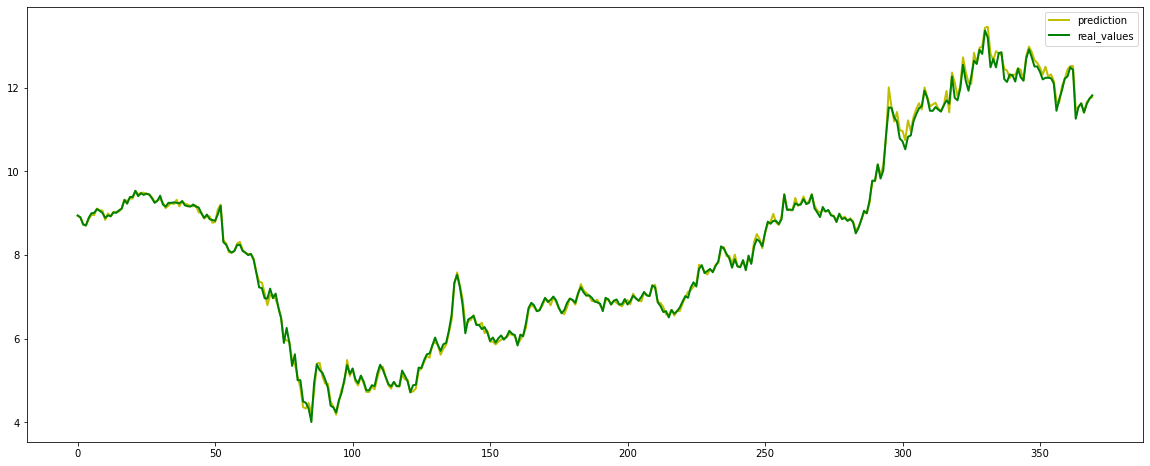

In [ ]:
Ridge_MAE , Ridge_MSE,ridge = Ridge(X_train,y_train,X_test,y_test)

## Linear Regression Model

In [ ]:
def LR (X_train,X_test,y_train,y_test):
  
  reg=LinearRegression()
  reg.fit(X_train,y_train)

  cv = cross_val_score(reg, X_train, y_train, cv = ts_cross_val, scoring= "neg_mean_squared_error")
  print('Cross Val Score {}'.format(cv))
  
  LR_predictions=reg.predict(X_test)
  
  
  plt.figure(figsize=(20,8))
  plt.plot(reg.predict(X_test[-400:]), "y", label="prediction", linewidth=2.0)
  plt.plot(y_test.values[-400:], "g", label="real_values", linewidth=2.0)
  plt.legend(loc="best")
  
  MAE_LR=mean_absolute_error(LR_predictions,y_test)
  MSE_LR=mean_squared_error(LR_predictions,y_test)
  print('MAE for Linear regression {} and MSE  is {}'.format(MAE_LR,MSE_LR))
  
  return MAE_LR,MSE_LR,reg

Cross Val Score [-0.02458894 -0.01174963 -0.00321103 -0.00572599 -0.00454075]
MAE for Linear regression 0.06838052317112123 and MSE  is 0.009528853748873021


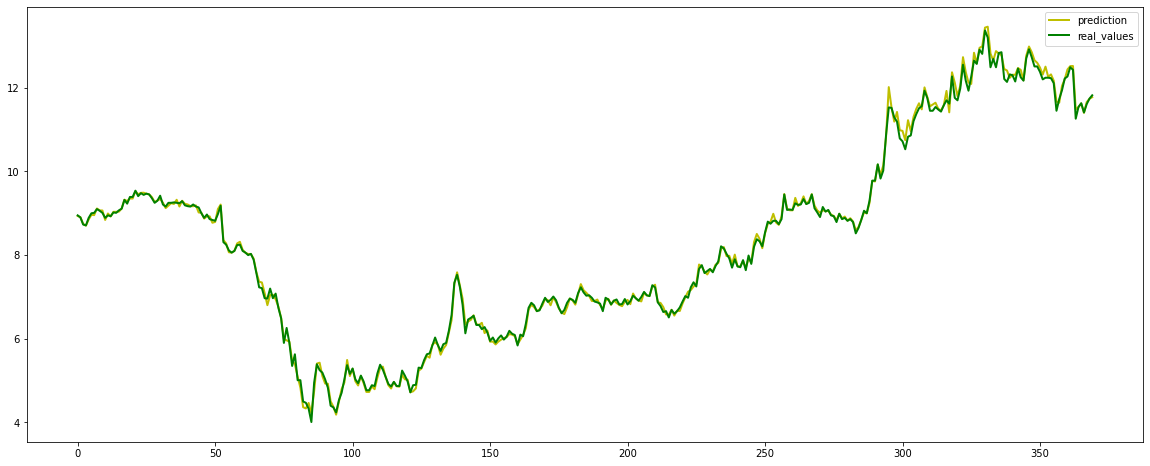

In [ ]:
LR_MAE , LR_MSE ,reg= LR(X_train,X_test,y_train,y_test)

## Support Vector Regression Model

In [ ]:
def SVR (X_train,X_test,y_train,y_test):
  from sklearn.svm import SVR
  svr = SVR(kernel='linear', C=1000, gamma=1)
  svr.fit(X_train, y_train)
  
  #cv_svr = cross_val_score(svr, X_train, y_train, cv = ts_cross_val, scoring= "neg_mean_squared_error")
  #cv_svr
  
  SVR_predictions =svr.predict(X_test)
  
  
  plt.figure(figsize=(20,8))
  plt.plot(svr.predict(X_test[-400:]), "y", label="prediction", linewidth=2.0)
  plt.plot(y_test.values[-400:], "g", label="real_values", linewidth=2.0)
  plt.legend(loc="best")
  
  MAE_SVR=mean_absolute_error(SVR_predictions,y_test)
  MSE_SVR=mean_squared_error(SVR_predictions,y_test)
  print('MAE for Support Vector regressor {}  and MSE  is {}'.format(MAE_SVR,MSE_SVR))
  
  return MAE_SVR ,MSE_SVR,svr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE for Support Vector regressor 0.0807092367830377  and MSE  is 0.012300181439204883


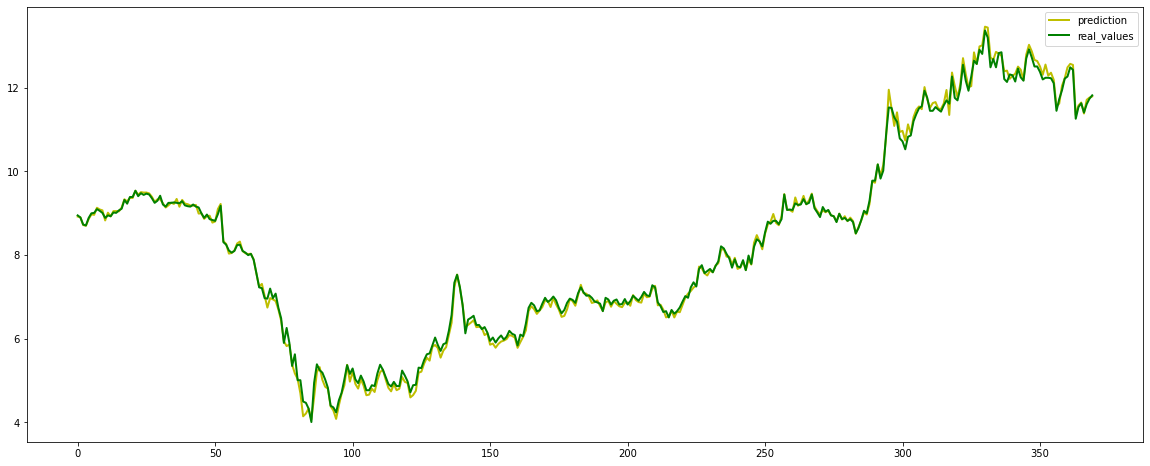

In [ ]:
SVR_MAE ,SVR_MSE,svr =SVR(X_train,X_test,y_train,y_test)

# Ensemble Learning

## Average Ensamble

In [ ]:
def Ensemble_Learing(X_train,X_test,y_train,y_test):
  reg_voting=VotingRegressor(estimators=[('reg',reg),
                                       ('svr',svr),
                                       ('ridge',ridge)],
                                       weights=[5,0,5])
  reg_voting.fit(X_train,y_train)
  y_pred=reg_voting.predict(X_test)
  MAE_ENS=mean_absolute_error(y_pred,y_test)
  MSE_ENS=mean_squared_error(y_pred,y_test)
  print('MAE for Support Vector regressor {}  and MSE  is {}'.format(MAE_ENS,MSE_ENS))
  return MAE_ENS,MSE_ENS,reg_voting



In [ ]:
ENS_MAE,ENS_MSE,ENS =Ensemble_Learing(X_train,X_test,y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE for Support Vector regressor 0.06848793582082302  and MSE  is 0.009535973485020057


## Bagging Ensemble

In [ ]:
reg_bag=BaggingRegressor(base_estimator=ENS,n_estimators=2)
reg_bag.fit(X_train,y_train)
pred=reg_bag.predict(X_test)
print(mean_absolute_error(pred,y_test))
print(mean_squared_error(pred,y_test))
r2_score(pred,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.06371742373717411
0.007603027924593319


0.9986284570752589

In [ ]:
ENS_MSE=mean_squared_error(pred,y_test)
ENS_MAE=mean_absolute_error(pred,y_test)


# Rsults and Comparison of models

In [ ]:
models = pd.DataFrame({
    'Model': ['LinearRegression', 
              'Ridge',
              'SVR',
              'Ensemble'],
    'MSE': [LR_MSE,Ridge_MSE,SVR_MSE,ENS_MSE],
    'MAE':[LR_MAE,Ridge_MAE,SVR_MAE,ENS_MAE]})
models.sort_values(by='MAE', ascending=True)

,Model,MSE,MAE
3,Ensemble,0.007603,0.063717
0,LinearRegression,0.009529,0.068381
1,Ridge,0.009544,0.068596
2,SVR,0.012300,0.080709


In [ ]:

reg_bag.predict([[11.76,11.48,11.55,11.74	]])

array([11.70027672])

In [ ]:
11.74-11.70

0.040000000000000924

In [ ]:
import pickle
filename = 'regression_model.pkl'
pickle.dump(reg_bag, open(filename, 'wb'))
 

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9985980861728792
